In [125]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [126]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):

    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__() # instantiate our nn.Module
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [127]:
# Pick a manual seed for randomization
torch.manual_seed(32)
# Create an instance of model
model = Model()

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [130]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [145]:
df['species'] = df['species'].replace({
    'setosa': 0.0,
    'versicolor': 1.0,
    'virginica': 2.0
})

In [132]:
# Train Test Split! Set X, y
X = df.drop('species', axis=1)
y = df ['species']

In [133]:
# Convert these to numpy arrays

X = X.values
y = y.values

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [136]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [137]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [138]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [139]:
# Train the model
epochs = 100
losses = []

for i in range(epochs):
    # Forward Propagation
    y_pred = model.forward(X_train)

    # Measure the loss/error
    loss = criterion(y_pred, y_train)

    losses.append(loss.detach().numpy())

    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')

    # Back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    

Epoch: 0 and loss: 1.169895887374878
Epoch: 10 and loss: 0.9578844308853149
Epoch: 20 and loss: 0.7988812327384949
Epoch: 30 and loss: 0.6349534392356873
Epoch: 40 and loss: 0.44043004512786865
Epoch: 50 and loss: 0.291716992855072
Epoch: 60 and loss: 0.1782904416322708
Epoch: 70 and loss: 0.11587586998939514
Epoch: 80 and loss: 0.08928152173757553
Epoch: 90 and loss: 0.07743765413761139


Text(0.5, 0, 'Epoch')

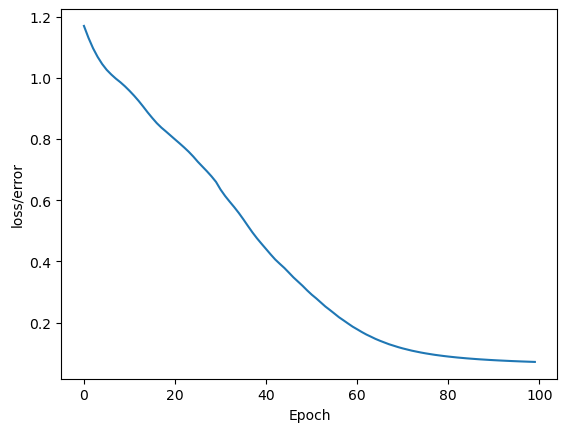

In [140]:
# Graph loss/error

plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

In [141]:
# Evaluate the Model

with torch.no_grad(): # No back propagation
    y_eval = model.forward(X_test) 
    loss = criterion(y_eval, y_test)

In [142]:
loss

tensor(0.0539)

In [143]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')

        # Correct or not 

        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'Correct: {correct}')

1.) tensor([-3.3580,  3.9452,  0.3616]) 	 1
2.) tensor([  7.5862,   1.1113, -11.3861]) 	 0
3.) tensor([  6.6288,   1.5092, -10.4603]) 	 0
4.) tensor([-3.3304,  4.2647,  0.0569]) 	 1
5.) tensor([-7.3705,  2.8135,  5.1481]) 	 2
6.) tensor([-7.3749,  3.9061,  4.2781]) 	 2
7.) tensor([  6.2304,   1.6527, -10.0543]) 	 0
8.) tensor([  6.8783,   1.4056, -10.7016]) 	 0
9.) tensor([-2.6728,  4.3138, -0.6444]) 	 1
10.) tensor([  7.2201,   1.3890, -11.1494]) 	 0
11.) tensor([-3.8269,  4.4110,  0.5165]) 	 1
12.) tensor([-8.6886,  1.9990,  6.9012]) 	 2
13.) tensor([-2.0605,  3.8275, -0.7672]) 	 1
14.) tensor([-1.0676,  4.3809, -2.2975]) 	 1
15.) tensor([-7.5000,  2.6230,  5.3318]) 	 2
16.) tensor([-8.6214,  1.5491,  7.1280]) 	 2
17.) tensor([-3.7724,  3.6503,  0.9422]) 	 1
18.) tensor([-6.7624,  2.7791,  4.5289]) 	 2
19.) tensor([-1.6978,  4.2047, -1.4772]) 	 1
20.) tensor([  7.8104,   1.3824, -11.9435]) 	 0
21.) tensor([  6.9175,   1.5954, -10.9322]) 	 0
22.) tensor([-9.4323,  2.7058,  7.2346]) 	 

In [144]:
test_iris_data = torch.tensor([6.7, 3.0, 5.2, 2.3])

with torch.no_grad():
    print(model(test_iris_data))

tensor([-8.7797,  2.0760,  6.9604])
